In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

import pickle as pkl
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [93]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
# check for duplicates

idsUnique_train = len(set(train['Id']))
idsTotal_train = train.shape[0]
idsDupli_train = idsTotal_train - idsUnique_train

idsUnique_test = len(set(test['Id']))
idsTotal_test = test.shape[0]
idsDupli_test = idsTotal_test - idsUnique_test

print('There are {} duplicates in the train dataset'.format(idsDupli_train))
print('There are {} duplicates in the test dataset'.format(idsDupli_test))

There are 0 duplicates in the train dataset
There are 0 duplicates in the test dataset


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

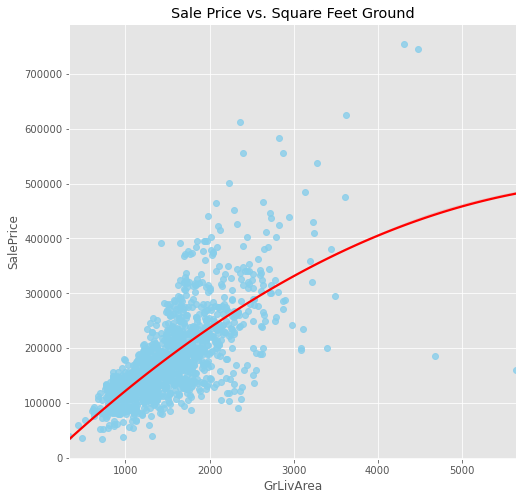

In [19]:
fig = plt.figure(figsize=(8,8))

sns.regplot(x='GrLivArea', y='SalePrice', data=train, order=2, ci=0.95,
   marker='o', scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

plt.title('Sale Price vs. Square Feet Ground')
plt.show()

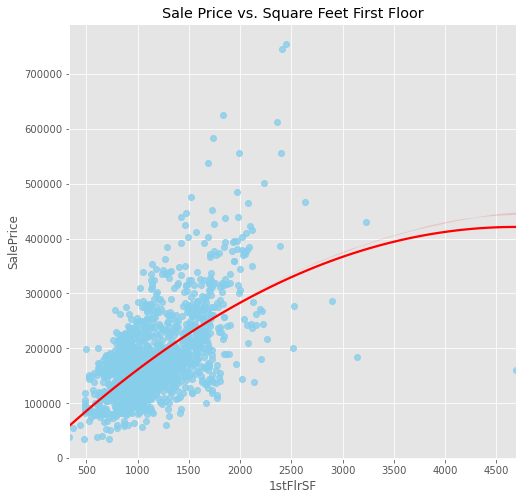

In [20]:
fig = plt.figure(figsize=(8,8))

sns.regplot(x='1stFlrSF', y='SalePrice', data=train, order=2, ci=0.95,
   marker='o', scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

plt.title('Sale Price vs. Square Feet First Floor')
plt.show()

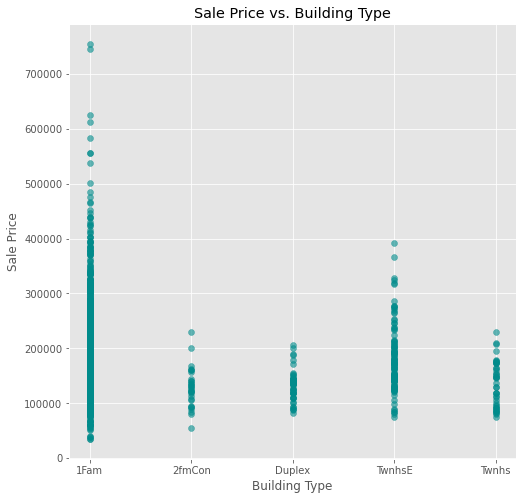

In [16]:
fig = plt.figure(figsize=(8,8))

plt.scatter(train['BldgType'], train['SalePrice'], color='darkcyan', alpha=0.6)
plt.xlabel('Building Type')
plt.ylabel('Sale Price')
plt.title('Sale Price vs. Building Type')
plt.show()

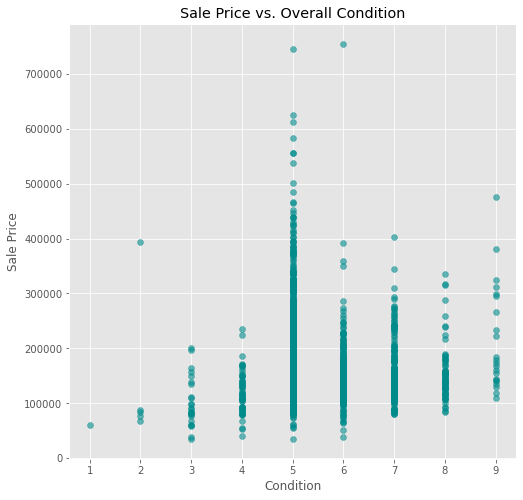

In [17]:
fig = plt.figure(figsize=(8,8))

plt.scatter(train['OverallCond'], train['SalePrice'], color='darkcyan', alpha=0.6)
plt.xlabel('Condition')
plt.ylabel('Sale Price')
plt.title('Sale Price vs. Overall Condition')
plt.show()

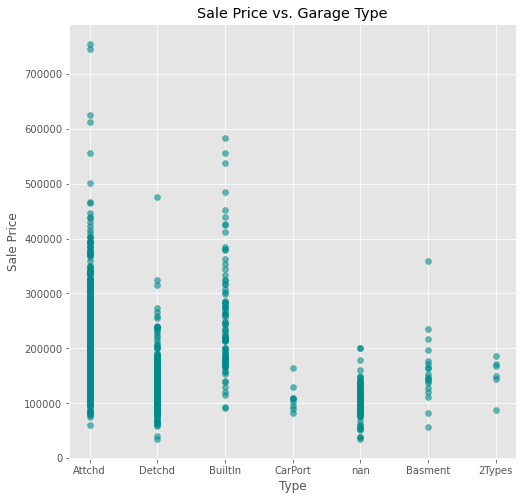

In [18]:
fig = plt.figure(figsize=(8,8))

plt.scatter(train['GarageType'].astype(str), train['SalePrice'], color='darkcyan', alpha=0.6)
plt.xlabel('Type')
plt.ylabel('Sale Price')
plt.title('Sale Price vs. Garage Type')
plt.show()

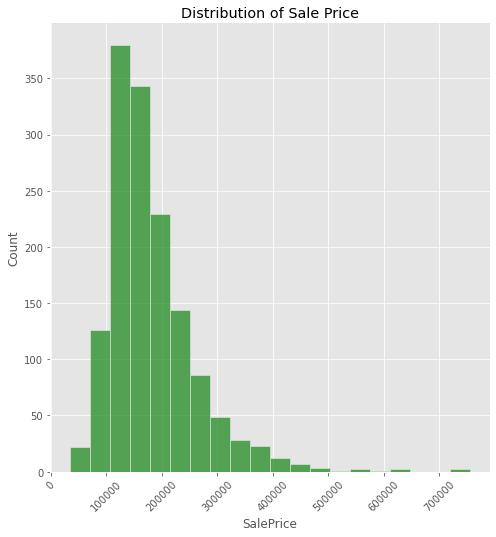

In [21]:
sns.displot(train['SalePrice'], color='forestgreen', bins=20, height=7)
plt.xticks(rotation=45)
plt.title('Distribution of Sale Price')
plt.show()

In [94]:
# log transformation to account for skew in price distribution

train['SalePrice'] = np.log1p(train['SalePrice'])

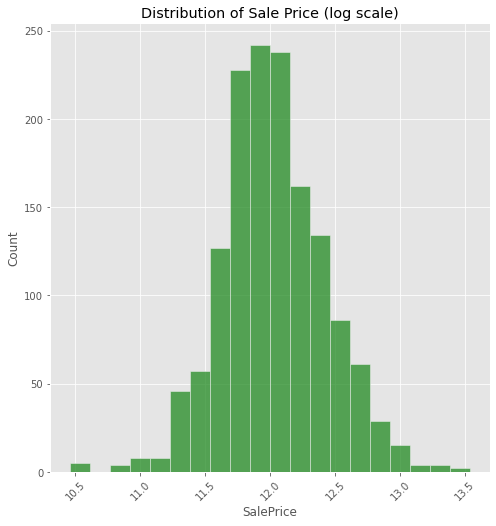

In [12]:
sns.displot(train['SalePrice'], color='forestgreen', bins=20, height=7)
plt.xticks(rotation=45)
plt.title('Distribution of Sale Price (log scale)')
plt.show()

In [95]:
train.drop('Id', axis=1, inplace=True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [96]:
test.set_index('Id', drop=True, inplace=True)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
print('Shape of train set {}'.format(train.shape))
print('Shape of test set {}'.format(test.shape))

Shape of train set (1460, 80)
Shape of test set (1459, 79)


In [97]:
# convert categorical numbers to string

train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

categorical = train.describe(include='object').columns
categorical

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [98]:
train_float_columns = []

for column in train.columns:
    if train[column].dtypes == float:
        train_float_columns.append(column)
        
train_float_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']

In [99]:
# fill NaNs for float columns with median values for train set

train_float_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

train[train_float_columns] = train[train_float_columns].fillna(-1).apply(np.int64)

lf_list = []
mv_list = []
gy_list = []

for column in train_float_columns:
    for row in range(train.shape[0]):
        if train[column].iloc[row] >= 0 and column == 'LotFrontage':
            lf_list.append(train[column].iloc[row])
        elif train[column].iloc[row] >=0 and column =='MasVnrArea':
            mv_list.append(train[column].iloc[row])
        elif train[column].iloc[row] >= 0 and column == 'GarageYrBlt':
            gy_list.append(train[column].iloc[row])
            
lf_median = np.median(np.array(lf_list))
mv_median = np.median(np.array(mv_list))
gy_median = np.median(np.array(gy_list))

train['LotFrontage'].replace(-1, lf_median, inplace=True)
train['MasVnrArea'].replace(-1, mv_median, inplace=True)
train['GarageYrBlt'].replace(-1, gy_median, inplace=True)

train[train_float_columns] = train[train_float_columns].astype(int)

train[train_float_columns].head(10)

,LotFrontage,MasVnrArea,GarageYrBlt
0,65,196,2003
1,80,0,1976
2,68,162,2001
3,60,0,1998
4,84,350,2000
5,85,0,1993
6,75,186,2004
7,69,240,1973
8,51,0,1931
9,50,0,1939


In [100]:
train[train_float_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LotFrontage  1460 non-null   int32
 1   MasVnrArea   1460 non-null   int32
 2   GarageYrBlt  1460 non-null   int32
dtypes: int32(3)
memory usage: 17.2 KB


In [101]:
test_float_columns = []

for column in test.columns:
    if test[column].dtypes == float:
        test_float_columns.append(column)

test_float_columns

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [102]:
# fill NaNs for float columns with median values for test set

test[test_float_columns] = test[test_float_columns].fillna(-1).apply(np.int64)

lf_list = []
mv_list = []
bsf1_list = []
bsf2_list = []
bsusf_list = []
totalbssf_list = []
bsfb_list = []
bshf_list = []
gy_list = []
gc_list = []
ga_list = []

for column in test_float_columns:
    for row in range(test.shape[0]):
        if test[column].iloc[row] >= 0 and column == 'LotFrontage':
            lf_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column =='MasVnrArea':
            mv_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column == 'BsmtFinSF1':
            bsf1_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column == 'BsmtFinSF2':
            bsf2_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column == 'BsmtUnfSF':
            bsusf_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column == 'TotalBsmtSF':
            totalbssf_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column == 'BsmtFullBath':
            bsfb_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column == 'BsmtHalfBath':
            bshf_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column == 'GarageYrBlt':
            gy_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column == 'GarageCars':
            gc_list.append(test[column].iloc[row])
        elif test[column].iloc[row] >= 0 and column == 'GarageArea':
            ga_list.append(test[column].iloc[row])
            
lf_median = np.median(np.array(lf_list))
mv_median = np.median(np.array(mv_list))
bsf1_median = np.median(np.array(bsf1_list))
bsf2_median = np.median(np.array(bsf2_list))
bsusf_median = np.median(np.array(bsusf_list))
totalbssf_median = np.median(np.array(totalbssf_list))
bsfb_median = np.median(np.array(bsfb_list))
bshf_median = np.median(np.array(bshf_list))
gy_median = np.median(np.array(gy_list))
gc_median = np.median(np.array(gc_list))
ga_median = np.median(np.array(ga_list))


test['LotFrontage'].replace(-1, lf_median, inplace=True)
test['MasVnrArea'].replace(-1, mv_median, inplace=True)
test['BsmtFinSF1'].replace(-1, bsf1_median, inplace=True) 
test['BsmtFinSF2'].replace(-1, bsf2_median, inplace=True) 
test['BsmtUnfSF'].replace(-1, bsusf_median, inplace=True) 
test['TotalBsmtSF'].replace(-1, totalbssf_median, inplace=True) 
test['BsmtFullBath'].replace(-1, bsfb_median, inplace=True) 
test['BsmtHalfBath'].replace(-1, bshf_median, inplace=True) 
test['GarageYrBlt'].replace(-1, gy_median, inplace=True)
test['GarageCars'].replace(-1, gc_median, inplace=True) 
test['GarageArea'].replace(-1, ga_median, inplace=True) 

test[test_float_columns] = test[test_float_columns].astype(int)

test[test_float_columns].head(10)

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,,,,,
1461,80,0,468,144,270,882,0,0,1961,1,730
1462,81,108,923,0,406,1329,0,0,1958,1,312
1463,74,0,791,0,137,928,0,0,1997,2,482
1464,78,20,602,0,324,926,0,0,1998,2,470
1465,43,0,263,0,1017,1280,0,0,1992,2,506
1466,75,0,0,0,763,763,0,0,1993,2,440
1467,67,0,935,0,233,1168,1,0,1992,2,420
1468,63,0,0,0,789,789,0,0,1998,2,393
1469,85,0,637,0,663,1300,1,0,1990,2,506


In [103]:
test[test_float_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotFrontage   1459 non-null   int32
 1   MasVnrArea    1459 non-null   int32
 2   BsmtFinSF1    1459 non-null   int32
 3   BsmtFinSF2    1459 non-null   int32
 4   BsmtUnfSF     1459 non-null   int32
 5   TotalBsmtSF   1459 non-null   int32
 6   BsmtFullBath  1459 non-null   int32
 7   BsmtHalfBath  1459 non-null   int32
 8   GarageYrBlt   1459 non-null   int32
 9   GarageCars    1459 non-null   int32
 10  GarageArea    1459 non-null   int32
dtypes: int32(11)
memory usage: 74.1 KB


In [104]:
# fill NaNs for strings and integers

for column in train.columns:
    if train[column].dtypes == object:
        train[column].fillna('None', inplace=True)
    else:
        train[column].fillna(np.median(train[column]), inplace=True)

for column in test.columns:
    if test[column].dtypes == object:
        test[column].fillna('None', inplace=True)
    else:
        test[column].fillna(np.median(test[column]), inplace=True)

In [105]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,12.429220


In [106]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
1464,60,RL,78,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2010,WD,Normal
1465,120,RL,43,5005,Pave,None,IR1,HLS,AllPub,Inside,...,144,0,None,None,None,0,1,2010,WD,Normal


In [107]:
# encode categorical values

for column in categorical:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column])
    test[column] = le.fit_transform(test[column])

In [108]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,3,65,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,12.247699
1,4,3,80,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,12.109016
2,9,3,68,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,12.317171
3,10,3,60,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,11.849405
4,9,3,84,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,12.429220


In [109]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,5,3,80,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,9,4
1462,5,4,81,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,9,4
1463,10,4,74,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,9,4
1464,10,4,78,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,9,4
1465,0,4,43,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,9,4


In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int32  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   int32  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1459 non-null   int32
 1   MSZoning       1459 non-null   int32
 2   LotFrontage    1459 non-null   int32
 3   LotArea        1459 non-null   int64
 4   Street         1459 non-null   int32
 5   Alley          1459 non-null   int32
 6   LotShape       1459 non-null   int32
 7   LandContour    1459 non-null   int32
 8   Utilities      1459 non-null   int32
 9   LotConfig      1459 non-null   int32
 10  LandSlope      1459 non-null   int32
 11  Neighborhood   1459 non-null   int32
 12  Condition1     1459 non-null   int32
 13  Condition2     1459 non-null   int32
 14  BldgType       1459 non-null   int32
 15  HouseStyle     1459 non-null   int32
 16  OverallQual    1459 non-null   int64
 17  OverallCond    1459 non-null   int64
 18  YearBuilt      1459 non-null   int64
 19  Yea

In [13]:
# separate target (sale price) from features

X = train.iloc[:,0:79]
y = train['SalePrice']

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (1460, 79)
Shape of y: (1460,)


In [14]:
# split dataset into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=108)

In [15]:
def rmse(actual, predict):
    return np.sqrt(mean_squared_error(actual, predict))

In [83]:
# create pipeline to add polynomial features, scale, and fit linear regression model

pf = PolynomialFeatures(degree=2)
ss = StandardScaler()
lr = LinearRegression()

estimator_lr = Pipeline([('polynomial features', pf), ('scaler', ss), ('regression', lr)])


In [84]:
# linear regression

estimator_lr.fit(X_train, y_train)
y_pred_lr = estimator_lr.predict(X_val)
rmse_lr = rmse(y_val,  y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

print('Linear Regression')
print('RMSE: {}'.format(rmse_lr))
print('R squared: {}'.format(r2_lr))

Linear Regression
RMSE: 0.3665870882325309
R squared: 0.10058420895153186


In [85]:
# create pipeline to add polynomial features, scale, and fit ridge model

pf = PolynomialFeatures(degree=2)
ss = StandardScaler()
ridge = Ridge()

estimator_ridge = Pipeline([('polynomial features', pf), ('scaler', ss), ('ridge', ridge)])

In [86]:
# ridge

estimator_ridge.fit(X_train, y_train)
y_pred_ridge = estimator_ridge.predict(X_val)
rmse_ridge = rmse(y_val,  y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

print('Ridge')
print('RMSE: {}'.format(rmse_ridge))
print('R squared: {}'.format(r2_ridge))

Ridge
RMSE: 0.25838262451963195
R squared: 0.5531798088689723


In [87]:
# grid search for ridge

alphas = np.array([25, 50, 200, 350, 500])
params_ridge = {'ridge__alpha': alphas}
grid_ridge = GridSearchCV(estimator_ridge, params_ridge, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_ridge.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([ 25,  50, 200, 350, 500])},
             scoring='neg_root_mean_squared_error')

In [88]:
# scores for ridge grid search

print('Ridge')
print('Best score (rmse):', np.abs(grid_ridge.best_score_))
print('Best parameters', grid_ridge.best_params_)
print('Best estimator: ',grid_ridge.best_estimator_)

Ridge
Best score (rmse): 0.14193253893319355
Best parameters {'ridge__alpha': 350}
Best estimator:  Pipeline(steps=[('polynomial features', PolynomialFeatures()),
                ('scaler', StandardScaler()), ('ridge', Ridge(alpha=350))])


In [89]:
pkl.dump(grid_ridge, open('ridge.pkl', 'wb'))

In [16]:
grid_ridge = pkl.load(open('ridge.pkl', 'rb'))

In [21]:
# predict ridge to test set

y_pred_grid_ridge = grid_ridge.predict(X_val)
rmse_grid_ridge = rmse(y_val, y_pred_grid_ridge)
r2_grid_ridge = r2_score(y_val, y_pred_grid_ridge)

print('Ridge Prediction Scores')
print('RMSE: {}'.format(rmse_grid_ridge))
print('R squared: {}'.format(r2_grid_ridge))

Ridge Prediction Scores
RMSE: 0.138451747105505
R squared: 0.8717069705958826


In [93]:
# create pipeline to add polynomial features, scale, and fit lasso model

pf = PolynomialFeatures(degree=2)
ss = StandardScaler()
lasso = Lasso()

estimator_lasso = Pipeline([('polynomial features', pf), ('scaler', ss), ('lasso', lasso)])

In [94]:
# lasso

estimator_lasso.fit(X_train, y_train)
y_pred_lasso = estimator_lasso.predict(X_val)
rmse_lasso = rmse(y_val,  y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print('LASSO')
print('RMSE: {}'.format(rmse_lasso))
print('R squared: {}'.format(r2_lasso))

LASSO
RMSE: 0.3869783320975606
R squared: -0.002257872839013464


In [95]:
# grid search for lasso

alphas = [1e-3, 0.01, 0.05, 0.1]
params_lasso = {'lasso__alpha': alphas}
grid_lasso = GridSearchCV(estimator_lasso, params_lasso, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_lasso.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1, param_grid={'lasso__alpha': [0.001, 0.01, 0.05, 0.1]},
             scoring='neg_root_mean_squared_error')

In [61]:
# scores for lasso grid search

print('LASSO')
print('Best score (rmse):', np.abs(grid_lasso.best_score_))
print('Best parameters', grid_lasso.best_params_)
print('Best estimator: ',grid_lasso.best_estimator_)

LASSO
Best score (rmse): 0.15289154017348316
Best parameters {'lasso__alpha': 0.01}
Best estimator:  Pipeline(steps=[('polynomial features', PolynomialFeatures()),
                ('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.01))])


In [62]:
pkl.dump(grid_lasso, open('lasso.pkl', 'wb'))

In [17]:
grid_lasso = pkl.load(open('lasso.pkl', 'rb'))

In [22]:
# predict lasso to test set

y_pred_grid_lasso = grid_lasso.predict(X_val)
rmse_grid_lasso = rmse(y_val, y_pred_grid_lasso)
r2_grid_lasso = r2_score(y_val, y_pred_grid_lasso)

print('LASSO Prediction Scores')
print('RMSE: {}'.format(rmse_grid_lasso))
print('R squared: {}'.format(r2_grid_lasso))

LASSO Prediction Scores
RMSE: 0.12719641204514237
R squared: 0.8917180916086325


In [115]:
# create pipeline to add polynomial features, scale, and fit elastic net model

pf = PolynomialFeatures(degree=2)
ss = StandardScaler()
elastic = ElasticNet()

estimator_elastic = Pipeline([('polynomial features', pf), ('scaler', ss), ('elastic net', elastic)])

In [116]:
# elastic net

estimator_elastic.fit(X_train, y_train)
y_pred_elastic = estimator_elastic.predict(X_val)
rmse_elastic = rmse(y_val,  y_pred_elastic)
r2_elastic = r2_score(y_val, y_pred_elastic)

print('Elastic Net')
print('RMSE: {}'.format(rmse_elastic))
print('R squared: {}'.format(r2_elastic))

Elastic Net
RMSE: 0.3869783320975606
R squared: -0.002257872839013464


In [117]:
# grid search for elastic net

alphas = np.array([1e-5, 0.01, 25, 50, 200, 350])
l1_ratio = np.array([0.25, 0.5, 0.75])
params_elastic = {'elastic net__alpha': alphas, 'elastic net__l1_ratio': l1_ratio}
grid_elastic = GridSearchCV(estimator_elastic, params_elastic, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_elastic.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('elastic net', ElasticNet())]),
             n_jobs=-1,
             param_grid={'elastic net__alpha': array([1.0e-05, 1.0e-02, 2.5e+01, 5.0e+01, 2.0e+02, 3.5e+02]),
                         'elastic net__l1_ratio': array([0.25, 0.5 , 0.75])},
             scoring='neg_root_mean_squared_error')

In [118]:
# scores for elastic net grid search

print('Elastic Net')
print('Best score (rmse):', np.abs(grid_elastic.best_score_))
print('Best parameters', grid_elastic.best_params_)
print('Best estimator: ',grid_elastic.best_estimator_)

Elastic Net
Best score (rmse): 0.15038220627270366
Best parameters {'elastic net__alpha': 0.01, 'elastic net__l1_ratio': 0.5}
Best estimator:  Pipeline(steps=[('polynomial features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('elastic net', ElasticNet(alpha=0.01))])


In [169]:
pkl.dump(grid_elastic, open('elastic.pkl', 'wb'))

In [18]:
grid_elastic = pkl.load(open('elastic.pkl', 'rb'))

In [23]:
# predict elastic net to test set

y_pred_grid_elastic = grid_elastic.predict(X_val)
rmse_grid_elastic = rmse(y_val, y_pred_grid_elastic)
r2_grid_elastic = r2_score(y_val, y_pred_grid_elastic)

print('Elastic Net Prediction Scores')
print('RMSE: {}'.format(rmse_grid_elastic))
print('R squared: {}'.format(r2_grid_elastic))

Elastic Net Prediction Scores
RMSE: 0.1327647553080384
R squared: 0.8820299459950481


In [157]:
# random forest regressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rmse_rf = rmse(y_val,  rf_pred)
r2_rf = r2_score(y_val, rf_pred)

print('Random Forest')
print('RMSE: {}'.format(rmse_rf))
print('R squared: {}'.format(r2_rf))

Random Forest
RMSE: 0.13705365654377344
R squared: 0.8742849034698088


In [161]:
# randomized search CV

n_estimators = list(np.linspace(200, 2000, 10).astype(int))
max_features = ['auto', 'sqrt']
max_depth = list(np.linspace(10, 110, 11).astype(int))
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=108, 
                               scoring='neg_root_mean_squared_error', n_jobs=-1)

In [162]:
rf_random.fit(X_train, y_train)

In [146]:
# scores for random forest randomized search

print('Random Forest')
print('Best score (rmse):', np.abs(rf_random.best_score_))
print('Best parameters', rf_random.best_params_)
print('Best estimator: ', rf_random.best_estimator_)

Random Forest
Best score (rmse): 0.14478747947610823
Best parameters {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}
Best estimator:  RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      n_estimators=2000)


In [147]:
pkl.dump(rf_random, open('rf_random.pkl', 'wb'))

In [19]:
rf_random = pkl.load(open('rf_random.pkl', 'rb'))

In [24]:
# predict random forest to test set

y_pred_rf_random = rf_random.predict(X_val)
rmse_rf_random = rmse(y_val, y_pred_rf_random)
r2_rf_random = r2_score(y_val, y_pred_rf_random)

print('Random Forest Prediciton Scores')
print('RMSE: {}'.format(rmse_rf_random))
print('R squared: {}'.format(r2_rf_random))

Random Forest Prediciton Scores
RMSE: 0.1382547534834451
R squared: 0.8720717898129695


In [27]:
# XGBoost regressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_val)
xgb_rmse = rmse(y_val, xgb_predict)
xgb_r2 = r2_score(y_val, xgb_predict)

print('XGBoost')
print('RMSE: {}'.format(xgb_rmse))
print('R2: {}'.format(xgb_r2))

XGBoost
RMSE: 0.14396913942217449
R2: 0.8612781101207587


In [44]:
# XGBoost Grid Search

max_depth = [4, 6, 8]
learning_rate = [1e-3, 0.1, 3, 5, 10]
n_estimators = [100, 150, 200, 350]
subsample = [0.1, 0.5, 1]
alpha = [0.01, 0.1, 1, 10, 100]

param_grid = {'max_depth': max_depth, 'learning_rate': learning_rate, 'n_estimators': n_estimators, 
              'subsample': subsample, 'alpha': alpha}

xgb_grid = GridSearchCV(xgb, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [45]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jo...
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
  

In [46]:
print('XGBoost')
print('Best score: {}'.format(np.abs(xgb_grid.best_score_)))
print('Best parameters: {}'.format(xgb_grid.best_params_))
print('Best estimator: {}'.format(xgb_grid.best_estimator_))

XGBoost
Best score: 0.01862679896490076
Best parameters: {'alpha': 0.01, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 350, 'subsample': 0.5}
Best estimator: XGBRegressor(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=350, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [47]:
pkl.dump(xgb_grid, open('xgb.pkl', 'wb'))

In [20]:
xgb_grid = pkl.load(open('xgb.pkl', 'rb'))

In [25]:
# predict XGBoost to test set

y_pred_xgb = xgb_grid.predict(X_val)
rmse_xgb = rmse(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

print('XGB Prediction Scores')
print('RMSE: {}'.format(rmse_xgb))
print('R squared: {}'.format(r2_xgb))

XGB Prediction Scores
RMSE: 0.12873876411255727
R squared: 0.8890761715054583


In [29]:
# voting regressor

estimators = [('lasso', grid_lasso), ('xgb', xgb_grid)]
vr = VotingRegressor(estimators, n_jobs=-1, verbose=True)
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('lasso',
                             GridSearchCV(estimator=Pipeline(steps=[('polynomial '
                                                                     'features',
                                                                     PolynomialFeatures()),
                                                                    ('scaler',
                                                                     StandardScaler()),
                                                                    ('lasso',
                                                                     Lasso())]),
                                          n_jobs=-1,
                                          param_grid={'lasso__alpha': [0.001,
                                                                       0.01,
                                                                       0.05,
                                                                       0.1]},
                 

In [33]:
pkl.dump(vr, open('vr.pkl', 'wb'))

In [ ]:
vr = pkl.load(open('vr.pkl', 'rb'))

In [31]:
vr_predict = vr.predict(X_val)
rmse_vr = rmse(y_val, vr_predict)
r2_vr = r2_score(y_val, vr_predict)

print('Voting Regressor')
print('RMSE: {}'.format(rmse_vr))
print('R2: {}'.format(r2_vr))

Voting Regressor
RMSE: 0.11824108712864026
R2: 0.9064286258122595


In [32]:
models = ['Ridge', 'LASSO', 'Elastic Net', 'Random Forest', 'XGBoost', 'Voting']
rmse_scores = [rmse_grid_ridge, rmse_grid_lasso, rmse_grid_elastic, rmse_rf_random, rmse_xgb, rmse_vr]
r2 = [r2_grid_ridge, r2_grid_lasso, r2_grid_elastic, r2_rf_random, r2_xgb, r2_vr]

data = {'Model': models, 'RMSE': rmse_scores, 'R2': r2}
df_scores = pd.DataFrame(data, columns=['Model', 'RMSE', 'R2'])

df_scores.style.background_gradient(cmap='YlGnBu')

,Model,RMSE,R2
0,Ridge,0.138452,0.871707
1,LASSO,0.127196,0.891718
2,Elastic Net,0.132765,0.882030
3,Random Forest,0.138255,0.872072
4,XGBoost,0.128739,0.889076
5,Voting,0.118241,0.906429


In [119]:
vr_predict_test = vr.predict(test)
vr_predict_test

array([11.75932882, 11.99827281, 12.08473812, ..., 11.96864228,
       11.6852189 , 12.32008517])

In [120]:
vr_predict_test = np.expm1(vr_predict_test)
vr_predict_test

array([127940.55262245, 162472.92557562, 177146.52251985, ...,
       157729.36199814, 118801.63906462, 224152.23213492])

In [121]:
data = {'Id': test.index, 'SalePrice': vr_predict_test}
submission = pd.DataFrame(data, columns=['Id', 'SalePrice'])
submission

,Id,SalePrice
0,1461,127940.552622
1,1462,162472.925576
2,1463,177146.522520
3,1464,192208.566193
4,1465,195302.027683
...,...,...
1454,2915,86949.084752
1455,2916,85459.412660
1456,2917,157729.361998
1457,2918,118801.639065


In [123]:
submission.to_csv('submission.csv', sep=',', index=False)